<a href="https://colab.research.google.com/github/Charuu12/ev_dataset/blob/main/TimeSeries_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# EV Dataset Preprocessing
# Removing unnecessay columns and reducing extra rows.

import pandas as pd

# Step 1: Load dataset
file_path = "https://github.com/Charuu12/ev_dataset/raw/refs/heads/main/EV_Dataset_Sorted.xlsx"

# Auto-detect and load file
if file_path.endswith('.csv'):
    try:
        df = pd.read_csv(file_path, encoding='utf-8')
    except UnicodeDecodeError:
        df = pd.read_csv(file_path, encoding='latin1')
elif file_path.endswith(('.xls', '.xlsx')):
    df = pd.read_excel(file_path)
else:
    raise ValueError("Unsupported file format. Use CSV or Excel.")

print("\n Dataset Loaded Successfully!")
print(df.info())
print("\nPreview:\n", df.head())

# Step 2: Keep only required columns
required_cols = ['Year', 'State', 'EV_Sales_Quantity']
df = df[required_cols].copy()

# Step 3: Remove rows with missing values
df = df.dropna(subset=required_cols)

# Step 4: Group by Year & State (sum values if duplicates exist)
ev_grouped = (
    df.groupby(['Year', 'State'])['EV_Sales_Quantity']
      .sum()
      .reset_index()
      .sort_values(['Year', 'State'])
      .reset_index(drop=True)
)

print("\n Processed EV Dataset (State-wise Yearly Totals):\n")
print(ev_grouped.head(20))

# # Step 5: Save cleaned files
# ev_grouped.to_excel("/content/EV_Dataset_Statewise_Summed.xlsx", index=False)
# ev_grouped.to_csv("/content/EV_Dataset_Statewise_Summed.csv", index=False)

# print("\n Cleaned dataset saved as:")
# print(" /content/EV_Dataset_Statewise_Summed.xlsx")
# print(" /content/EV_Dataset_Statewise_Summed.csv")



 Dataset Loaded Successfully!
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96021 entries, 0 to 96020
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               96021 non-null  int64  
 1   Month_Name         95985 non-null  object 
 2   Date               95985 non-null  object 
 3   State              96020 non-null  object 
 4   Vehicle_Class      95985 non-null  object 
 5   Vehicle_Category   95985 non-null  object 
 6   Vehicle_Type       95985 non-null  object 
 7   EV_Sales_Quantity  96020 non-null  float64
dtypes: float64(1), int64(1), object(6)
memory usage: 5.9+ MB
None

Preview:
    Year Month_Name      Date           State                   Vehicle_Class  \
0  2014        jan  1/1/2014  Andhra Pradesh                 ADAPTED VEHICLE   
1  2014        sep  9/1/2014      Chandigarh           CRANE MOUNTED VEHICLE   
2  2014        sep  9/1/2014      Chandigarh  CONSTRUCTION EQUI

<Figure size 1000x600 with 0 Axes>

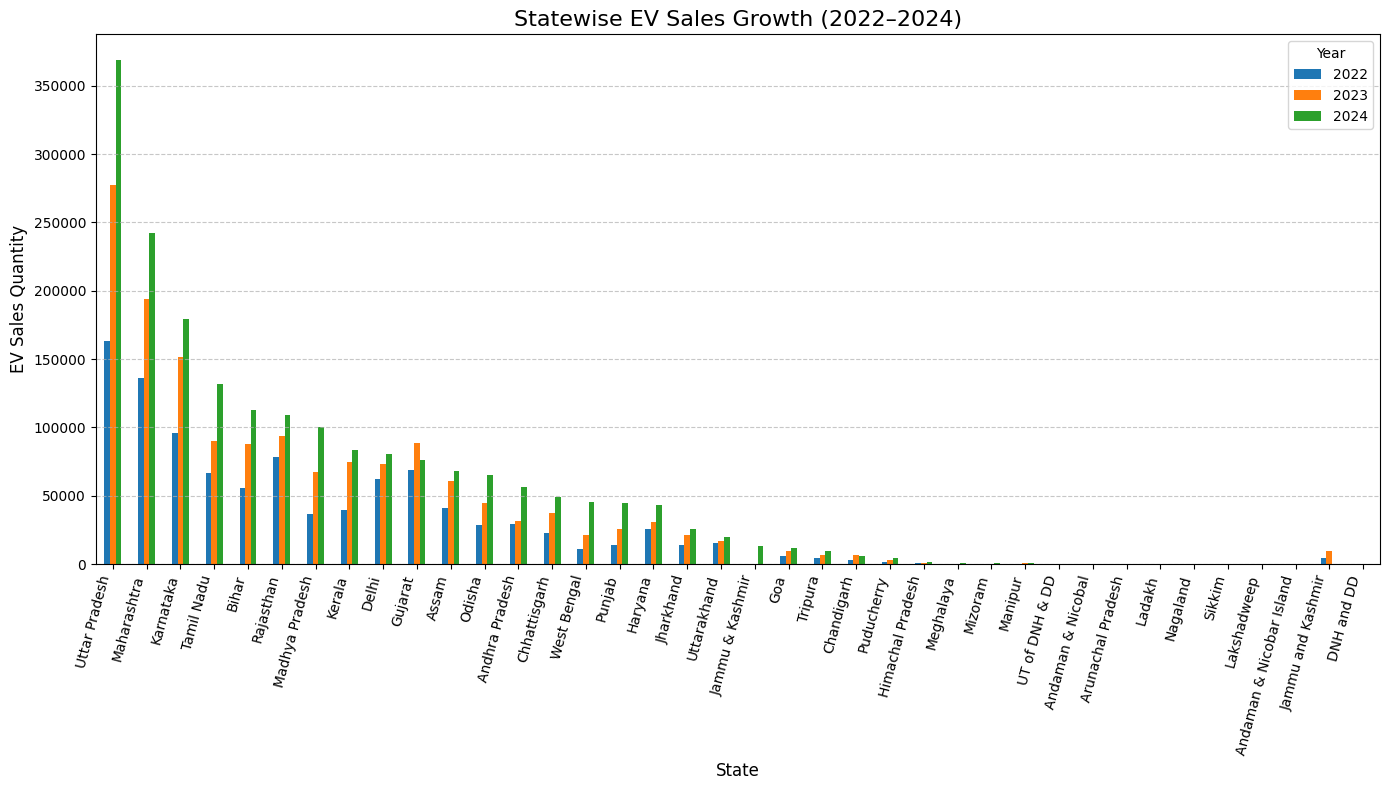

In [ ]:
# EV Statewise Growth Visualization (2022–2024)

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load your cleaned dataset
file_path_ev = "https://github.com/Charuu12/ev_dataset/raw/refs/heads/main/EV_Dataset_Statewise_Summed.xlsx"
df_ev = pd.read_excel(file_path_ev)

# Step 2: Filter data for years 2022–2024
filtered_df_ev = df_ev[df_ev['Year'].isin([2022, 2023, 2024])]

# Step 3: Group by Year and State
statewise_ev = filtered_df_ev.groupby(['Year', 'State'])['EV_Sales_Quantity'].sum().reset_index()

# Step 4: Pivot for easy plotting
pivot_ev = statewise_ev.pivot(index='State', columns='Year', values='EV_Sales_Quantity').fillna(0)

# Step 5: Sort by 2024 values for visual order
pivot_ev = pivot_ev.sort_values(by=2024, ascending=False)

# Step 6: Plot - statewise comparison
plt.figure(figsize=(10, 6))
pivot_ev.plot(kind='bar', figsize=(14, 8))
plt.title('Statewise EV Sales Growth (2022–2024)', fontsize=16)
plt.xlabel('State', fontsize=12)
plt.ylabel('EV Sales Quantity', fontsize=12)
plt.legend(title='Year')
plt.xticks(rotation=75, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

<Figure size 1400x800 with 0 Axes>

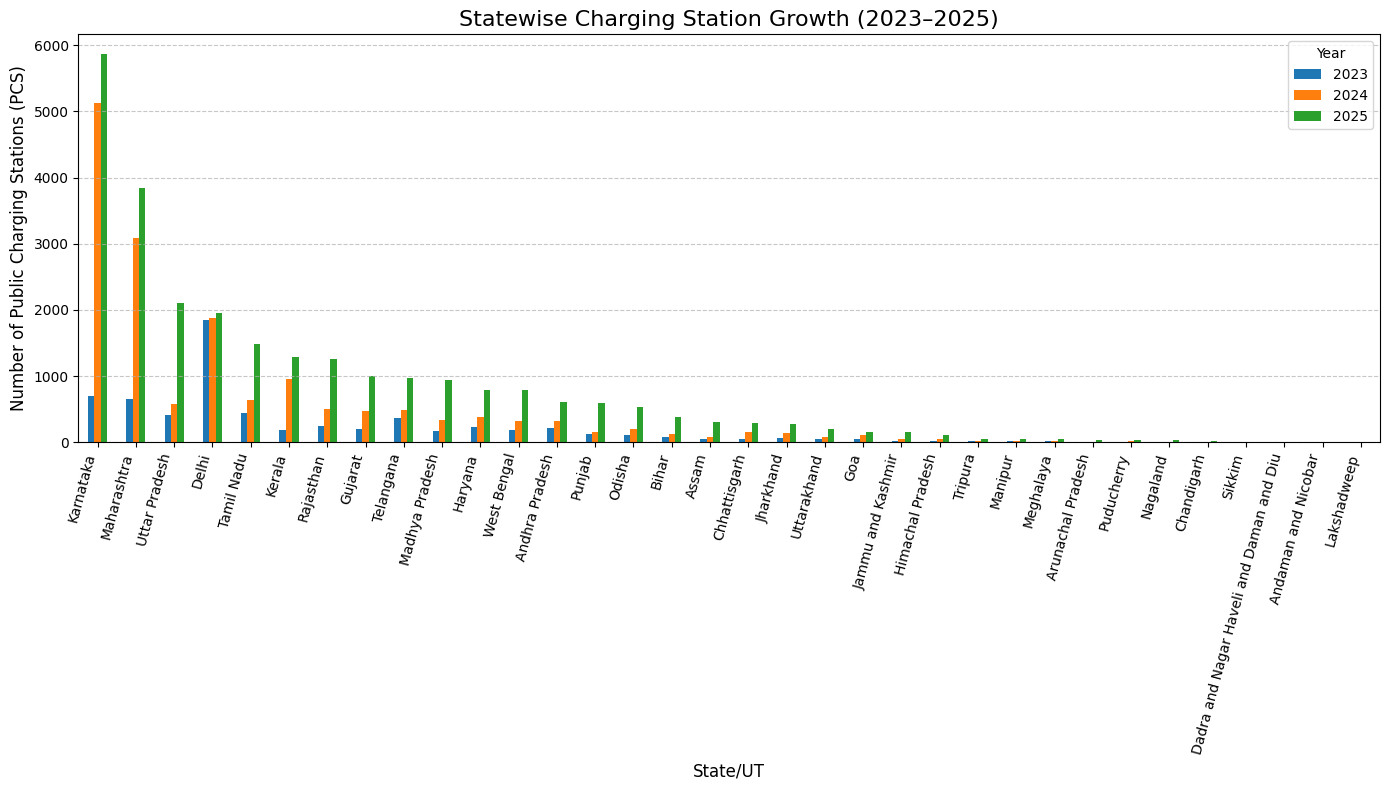

In [ ]:
# Charging Stations Statewise Growth Visualization (2023–2025)

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load dataset
file_path_cs = "https://github.com/Charuu12/ev_dataset/raw/refs/heads/main/charging%20stations.csv"
df_cs = pd.read_csv(file_path_cs, dtype=str, low_memory=False, encoding='utf-8')

# Step 2: Clean column names
df_cs.columns = df_cs.columns.str.strip()

# Step 3: Drop unnecessary and blank rows
df_cs = df_cs.dropna(subset=['State/UT'])
if 'Sl. No.' in df_cs.columns:
    df_cs = df_cs.drop(columns=['Sl. No.'])
df_cs = df_cs[df_cs['State/UT'].str.lower() != 'total']

# Step 4: Rename columns
df_cs.rename(columns={
    'State/UT': 'State',
    'No. of PCS (24-03-2023)': '2023',
    'No. of PCS (31-03-2024)': '2024',
    'No. of PCS (1-03-2025)': '2025'
}, inplace=True)

# Step 5: Convert numeric safely
for year in ['2023', '2024', '2025']:
    df_cs[year] = pd.to_numeric(df_cs[year], errors='coerce')

# Step 6: Melt for visualization
df_cs_melted = df_cs.melt(id_vars='State', var_name='Year', value_name='Charging_Stations')
df_cs_melted = df_cs_melted[df_cs_melted['Year'].isin(['2023', '2024', '2025'])]
df_cs_melted['Year'] = df_cs_melted['Year'].astype(int)
df_cs_melted['Charging_Stations'] = pd.to_numeric(df_cs_melted['Charging_Stations'], errors='coerce')
df_cs_melted = df_cs_melted.dropna(subset=['Charging_Stations'])

# Step 7: Pivot and plot
pivot_cs = df_cs_melted.pivot(index='State', columns='Year', values='Charging_Stations').fillna(0)
pivot_cs = pivot_cs.sort_values(by=2025, ascending=False)

plt.figure(figsize=(14, 8))
pivot_cs.plot(kind='bar', figsize=(14, 8))
plt.title('Statewise Charging Station Growth (2023–2025)', fontsize=16)
plt.xlabel('State/UT', fontsize=12)
plt.ylabel('Number of Public Charging Stations (PCS)', fontsize=12)
plt.legend(title='Year')
plt.xticks(rotation=75, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# OBJECTIVE 1
To analyse and compare EV adoption with charging infrastructure growth
across states.

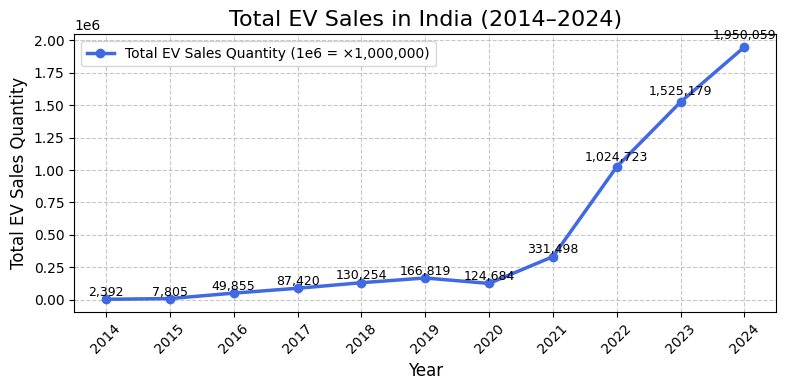

In [ ]:
# Year-wise Total EV Sales Growth (2014–2024)

import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Clean column names
df_ev.columns = df_ev.columns.str.strip().str.lower()

# Step 2: Group by year and sum total EV sales
yearly_ev = df_ev.groupby('year')['ev_sales_quantity'].sum().reset_index()

# Step 3: Plot line chart
plt.figure(figsize=(8, 4))
plt.plot(yearly_ev['year'], yearly_ev['ev_sales_quantity'],
         marker='o', linestyle='-', color='royalblue', linewidth=2.5, markersize=6)

# Step 4: Add titles and labels
plt.title('Total EV Sales in India (2014–2024)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total EV Sales Quantity', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# Step 5: Annotate each point with its value
for i, val in enumerate(yearly_ev['ev_sales_quantity']):
    plt.text(yearly_ev['year'][i], val + (val * 0.02), f'{int(val):,}',
             ha='center', va='bottom', fontsize=9)

# Step 6: Show all years clearly on the x-axis
plt.xticks(yearly_ev['year'], rotation=45)

# Step 7: Add legend explaining scale
plt.legend(['Total EV Sales Quantity (1e6 = ×1,000,000)'], loc='upper left', fontsize=10)

# Step 8: Tight layout and display
plt.tight_layout()
plt.show()

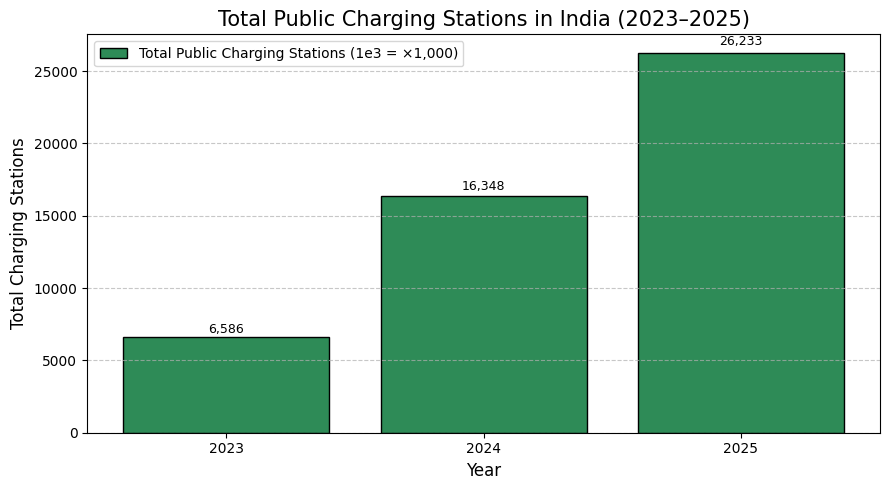

In [ ]:
# Year-wise Total Charging Stations Growth (2023–2025)

import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Clean column names
df_cs.columns = df_cs.columns.str.strip()

# Step 2: Drop unnecessary columns if present
if 'Sl. No.' in df_cs.columns:
    df_cs = df_cs.drop(columns=['Sl. No.'])

# Step 3: Rename columns for consistency
df_cs.rename(columns={
    'State/UT': 'State',
    'No. of PCS (24-03-2023)': '2023',
    'No. of PCS (31-03-2024)': '2024',
    'No. of PCS (1-03-2025)': '2025'
}, inplace=True)

# Step 4: Melt dataset (wide → long format)
df_cs_melted = df_cs.melt(id_vars='State', var_name='Year', value_name='Charging_Stations')
df_cs_melted = df_cs_melted[df_cs_melted['Year'].isin(['2023', '2024', '2025'])]

# Step 5: Convert data types
df_cs_melted['Year'] = df_cs_melted['Year'].astype(int)
df_cs_melted['Charging_Stations'] = pd.to_numeric(df_cs_melted['Charging_Stations'], errors='coerce')
df_cs_melted = df_cs_melted.dropna(subset=['Charging_Stations'])

# Step 6: Group data by year (sum of all states)
yearly_cs = df_cs_melted.groupby('Year')['Charging_Stations'].sum().reset_index()

plt.figure(figsize=(9, 5))

bars = plt.bar(yearly_cs['Year'], yearly_cs['Charging_Stations'],
               color='seagreen', edgecolor='black')

# Titles and labels
plt.title('Total Public Charging Stations in India (2023–2025)', fontsize=15)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Charging Stations', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + (yval * 0.015),
             f"{int(yval):,}", ha='center', va='bottom', fontsize=9)

plt.xticks(yearly_cs['Year'])
plt.legend(['Total Public Charging Stations (1e3 = ×1,000)'], loc='upper left', fontsize=10)
plt.tight_layout()

plt.show()

In [ ]:
# Calculate % Increase in EV Sales (2014 → 2024)

import pandas as pd

# Ensure consistent column names
df_ev.columns = df_ev.columns.str.strip().str.lower()

# Step 1: Group by year and sum total EV sales
yearly_ev = df_ev.groupby('year')['ev_sales_quantity'].sum().reset_index()

# Step 2: Extract EV sales for 2014 and 2024
sales_2014 = yearly_ev.loc[yearly_ev['year'] == 2014, 'ev_sales_quantity'].values[0]
sales_2024 = yearly_ev.loc[yearly_ev['year'] == 2024, 'ev_sales_quantity'].values[0]

# Step 3: Calculate percentage increase
percent_increase = ((sales_2024 - sales_2014) / sales_2014) * 100

# Step 4: Print result
print(f"EV Sales in 2014: {sales_2014:,}")
print(f"EV Sales in 2024: {sales_2024:,}")
print(f"Percentage increase in EV sales (2014 → 2024): {percent_increase:.2f}%")

EV Sales in 2014: 2,392
EV Sales in 2024: 1,950,059
Percentage increase in EV sales (2014 → 2024): 81424.21%


In [ ]:
# Calculate % Increase in Charging Stations (2023 → 2025)

import pandas as pd

# Ensure clean column names
df_cs_melted.columns = df_cs_melted.columns.str.strip()

# Step 1: Group by year and sum total public charging stations
yearly_cs = df_cs_melted.groupby('Year')['Charging_Stations'].sum().reset_index()

# Step 2: Extract total charging stations for 2023 and 2025
stations_2023 = yearly_cs.loc[yearly_cs['Year'] == 2023, 'Charging_Stations'].values[0]
stations_2025 = yearly_cs.loc[yearly_cs['Year'] == 2025, 'Charging_Stations'].values[0]

# Step 3: Calculate percentage increase
percent_increase_cs = ((stations_2025 - stations_2023) / stations_2023) * 100

# Step 4: Print results
print(f"Charging Stations in 2023: {stations_2023:,}")
print(f"Charging Stations in 2025: {stations_2025:,}")
print(f"Percentage increase in Charging Stations (2023 → 2025): {percent_increase_cs:.2f}%")

Charging Stations in 2023: 6,586
Charging Stations in 2025: 26,233
Percentage increase in Charging Stations (2023 → 2025): 298.31%


In [ ]:
import plotly.graph_objects as go

fig = go.Figure()

# EV Sales Gauge
fig.add_trace(go.Indicator(
    mode="gauge+number",
    value=81424.21,
    domain={'x': [0, 0.5], 'y': [0, 1]},
    title={'text': "EV Sales Growth (%)"},
    gauge={'axis': {'range': [0, 90000]},
           'bar': {'color': "royalblue"},
           'steps': [
               {'range': [0, 1000], 'color': "#e0ecf8"},
               {'range': [1000, 90000], 'color': "#c6d9ff"}]}))

# Charging Stations Gauge
fig.add_trace(go.Indicator(
    mode="gauge+number",
    value=1094.94,
    domain={'x': [0.55, 1], 'y': [0, 1]},
    title={'text': "Charging Stations Growth (%)"},
    gauge={'axis': {'range': [0, 90000]},
           'bar': {'color': "seagreen"},
           'steps': [
               {'range': [0, 1000], 'color': "#e0f8e0"},
               {'range': [1000, 90000], 'color': "#c8facc"}]}))

fig.update_layout(title_text="Growth Comparison: EV Sales vs Charging Stations (2014–2025)",
                  font=dict(size=10))
fig.show()

In [ ]:
# EV-to-Charging-Station Ratio (2023–2025)

import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Ensure both datasets are ready and clean
# (Assuming df_ev and df_cs_melted are already in memory)

# Clean column names for EV dataset
df_ev.columns = df_ev.columns.str.strip().str.lower()

# Step 2: Calculate yearly totals for EVs and charging stations
yearly_ev = df_ev.groupby('year')['ev_sales_quantity'].sum().reset_index()
yearly_cs = df_cs_melted.groupby('Year')['Charging_Stations'].sum().reset_index()

# Step 3: Align both datasets for overlapping years (2023–2024–2025)
# EV data goes till 2024, CS data 2023–2025, so we’ll take the intersection
common_years = set(yearly_ev['year']).intersection(set(yearly_cs['Year']))
ev_filtered = yearly_ev[yearly_ev['year'].isin(common_years)]
cs_filtered = yearly_cs[yearly_cs['Year'].isin(common_years)]

# Step 4: Merge both datasets
merged = pd.merge(ev_filtered, cs_filtered, left_on='year', right_on='Year', how='inner')

# Step 5: Calculate EV-to-Charging-Station ratio
merged['EV_to_CS_Ratio'] = merged['ev_sales_quantity'] / merged['Charging_Stations']

# Step 6: Display the ratio values
print("EV-to-Charging-Station Ratio (2023–2025):\n")
print(merged[['year', 'ev_sales_quantity', 'Charging_Stations', 'EV_to_CS_Ratio']].round(2))


EV-to-Charging-Station Ratio (2023–2025):

   year  ev_sales_quantity  Charging_Stations  EV_to_CS_Ratio
0  2023            1525179               6586          231.58
1  2024            1950059              16348          119.28


# OBJECTIVE 2
To forecast EV adoption in India up to 2030 by applying different MODELS.

In [ ]:

#EV Sales Forecasting (2014–2024)

import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import warnings

warnings.filterwarnings("ignore")

# Step 2: Clean column names
df_ev.columns = df_ev.columns.str.strip().str.lower()

# Step 3: Verify columns
if not {'year', 'state', 'ev_sales_quantity'}.issubset(df_ev.columns):
    raise ValueError("Dataset must contain: 'Year', 'State', 'EV_Sales_Quantity'")

# Step 4: Group all states -> total EV sales per year
df_yearly = df_ev.groupby('year', as_index=False)['ev_sales_quantity'].sum()

# Step 5: Ensure all years 2014–2024 exist
full_years = pd.DataFrame({'year': range(2014, 2025)})
df_yearly = pd.merge(full_years, df_yearly, on='year', how='left')

# Step 6: Fill missing values
df_yearly['ev_sales_quantity'] = (
    df_yearly['ev_sales_quantity']
    .interpolate(method='linear')
    .fillna(method='bfill')
    .fillna(method='ffill')
)

# Step 7: Sort and clean
df_yearly = df_yearly.sort_values('year').reset_index(drop=True)

# Step 8: Define training and testing data using integer slicing
train = df_yearly[df_yearly['year'] <= 2022]['ev_sales_quantity']
test = df_yearly[df_yearly['year'] > 2022]['ev_sales_quantity']

# Step 9: Drop any NaN just in case
train = train.dropna()
test = test.dropna()

In [ ]:
# Stationarity Tests: ADF and KPSS for EV Sales

import pandas as pd
from statsmodels.tsa.stattools import adfuller, kpss

# Step 1: Prepare EV sales time series
ev_series = df_yearly.groupby('year')['ev_sales_quantity'].sum()
ev_series.index = pd.Index(ev_series.index, name='Year')

# Step 2: Augmented Dickey-Fuller Test (ADF)
adf_result = adfuller(ev_series)
print(" --> Augmented Dickey-Fuller Test (ADF) ")
print(f"ADF Statistic: {adf_result[0]:.4f}")
print(f"p-value: {adf_result[1]:.4f}")
for key, value in adf_result[4].items():
    print(f"Critical Value ({key}): {value:.4f}")

# Step 3: KPSS Test
def kpss_test(series):
    kpss_stat, p_value, lags, crit = kpss(series, regression='c')
    print("\n --> KPSS Test ")
    print(f"KPSS Statistic: {kpss_stat:.4f}")
    print(f"p-value: {p_value:.4f}")
    for key, value in crit.items():
        print(f"Critical Value ({key}): {value:.4f}")
    return p_value

p_kpss = kpss_test(ev_series)

# Step 4: Interpretation
print("\n --> Interpretation ")

if adf_result[1] < 0.05:
    print("ADF: Reject H₀ → Series is Stationary.")
else:
    print("ADF: Fail to Reject H₀ → Series is Non-stationary.")

if p_kpss < 0.05:
    print("KPSS: Reject H₀ → Series is Non-stationary.")
else:
    print("KPSS: Fail to Reject H₀ → Series is Stationary.")

# Step 5: Final Conclusion
if adf_result[1] < 0.05 and p_kpss < 0.05:
    print("\n Conflicting results — likely trend-stationary, differencing may help.")
elif adf_result[1] > 0.05 and p_kpss > 0.05:
    print("\n Both suggest Stationary — no differencing needed.")
elif adf_result[1] > 0.05 and p_kpss < 0.05:
    print("\n Series is Non-stationary — differencing is required before ARIMA/SARIMA.")
else:
    print("\nℹ Possibly stationary with mild trend — can test SARIMA after differencing (d=1).")

 --> Augmented Dickey-Fuller Test (ADF) 
ADF Statistic: 3.4083
p-value: 1.0000
Critical Value (1%): -4.6652
Critical Value (5%): -3.3672
Critical Value (10%): -2.8030

 --> KPSS Test 
KPSS Statistic: 0.5068
p-value: 0.0401
Critical Value (10%): 0.3470
Critical Value (5%): 0.4630
Critical Value (2.5%): 0.5740
Critical Value (1%): 0.7390

 --> Interpretation 
ADF: Fail to Reject H₀ → Series is Non-stationary.
KPSS: Reject H₀ → Series is Non-stationary.

 Series is Non-stationary — differencing is required before ARIMA/SARIMA.


<Figure size 1000x800 with 0 Axes>

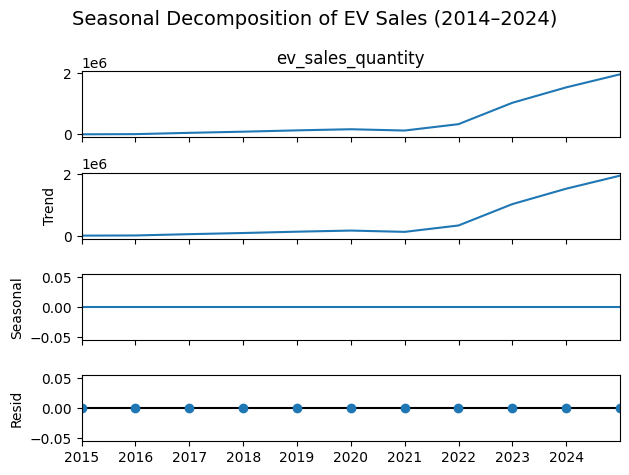

<Figure size 800x400 with 0 Axes>

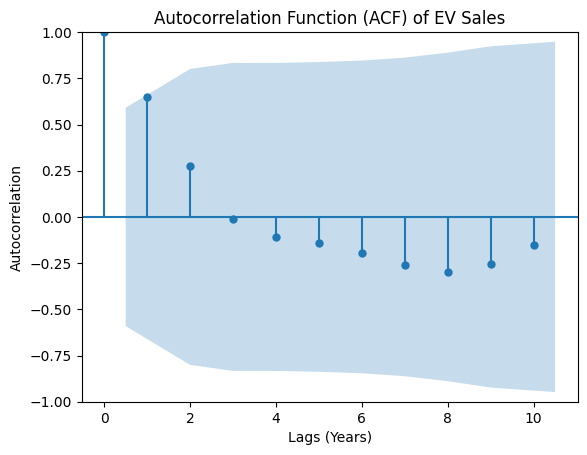


Max ACF (excluding lag 0): 0.646
 No clear seasonality → Use ARIMA (trend-based).

 Also inspect the decomposition plots:
   - If 'Seasonal' component is flat → No seasonality (use ARIMA).
   - If it oscillates periodically → Seasonality exists (use SARIMA).


In [ ]:
# Check Seasonality in EV Sales Data (2014–2024)

import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf

# Step 1: Prepare the yearly EV sales data
ev_series = df_yearly.groupby('year')['ev_sales_quantity'].sum()
ev_series.index = pd.date_range(start=f"{ev_series.index.min()}",
                                periods=len(ev_series), freq='Y')

# Step 2: Seasonal decomposition (Additive Model)
decomposition = seasonal_decompose(ev_series, model='additive', period=1)

# Step 3: Plot components
plt.figure(figsize=(10, 8))
decomposition.plot()
plt.suptitle('Seasonal Decomposition of EV Sales (2014–2024)', fontsize=14)
plt.tight_layout()
plt.show()

# Step 4: Plot Autocorrelation Function (ACF)
plt.figure(figsize=(8, 4))
plot_acf(ev_series, lags=10)
plt.title("Autocorrelation Function (ACF) of EV Sales")
plt.xlabel("Lags (Years)")
plt.ylabel("Autocorrelation")
plt.show()

# Step 5: Simple logic to determine if seasonality exists
from statsmodels.tsa.stattools import acf
import numpy as np

acf_values = acf(ev_series, fft=False, nlags=10)
seasonal_strength = np.max(np.abs(acf_values[1:]))  # max autocorrelation (excluding lag 0)

print(f"\nMax ACF (excluding lag 0): {seasonal_strength:.3f}")

# Step 6: Interpretation
if seasonal_strength > 0.5 and ev_series.index.freq != 'Y':
    print(" Strong autocorrelation detected → likely seasonal → SARIMA may be suitable.")
else:
    print(" No clear seasonality → Use ARIMA (trend-based).")

# Step 7: Visual inspection tip
print("\n Also inspect the decomposition plots:")
print("   - If 'Seasonal' component is flat → No seasonality (use ARIMA).")
print("   - If it oscillates periodically → Seasonality exists (use SARIMA).")

 ARIMA Model Forecast Accuracy (2014–2024)
MAE:  628,620.09
RMSE: 671,010.34
MAPE: 35.05%
R²:   -8.9767


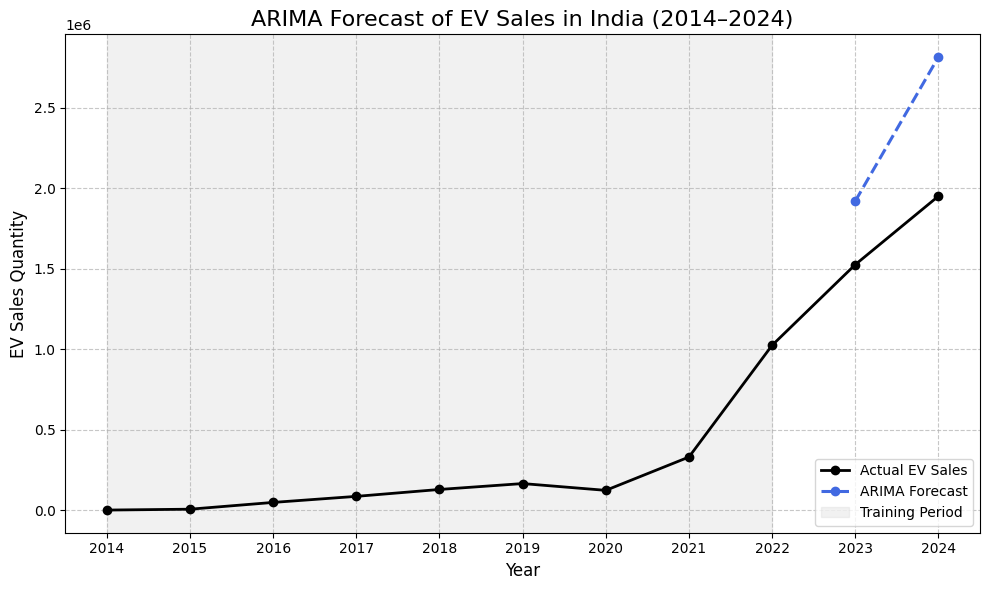


 Comparison of Actual vs Predicted EV Sales:
    Year  Actual_EV_Sales  Predicted_EV_Sales      Error
9   2023          1525179          1919082.97 -393903.97
10  2024          1950059          2813395.21 -863336.21


In [ ]:
#ARIMA Model for EV Sales Forecasting (2014–2024)

#  Step 10: Fit ARIMA model
model = ARIMA(train, order=(1,1,1))
fitted = model.fit()

# Step 11: Forecast for 2023–2024
forecast = fitted.forecast(steps=len(test))
forecast = pd.Series(forecast, index=test.index)

# Step 12: Evaluate
mae = mean_absolute_error(test, forecast)
rmse = np.sqrt(mean_squared_error(test, forecast))
mape = np.mean(np.abs((test - forecast) / test)) * 100
r2 = r2_score(test, forecast)

print(" ARIMA Model Forecast Accuracy (2014–2024)")
print(f"MAE:  {mae:,.2f}")
print(f"RMSE: {rmse:,.2f}")
print(f"MAPE: {mape:.2f}%")
print(f"R²:   {r2:.4f}")

# Step 13: Plot actual vs forecast
plt.figure(figsize=(10, 6))
plt.plot(df_yearly['year'], df_yearly['ev_sales_quantity'],
         label='Actual EV Sales', color='black', marker='o', linewidth=2)
plt.plot(df_yearly.loc[df_yearly['year'] > 2022, 'year'],
         forecast.values, label='ARIMA Forecast', color='royalblue', linestyle='--', marker='o', linewidth=2.2)

plt.axvspan(2014, 2022, color='lightgray', alpha=0.3, label='Training Period')
plt.title('ARIMA Forecast of EV Sales in India (2014–2024)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('EV Sales Quantity', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=10)
plt.xticks(np.arange(2014, 2025, 1))
plt.tight_layout()
plt.show()

# Step 14: Comparison Table
comparison_df = pd.DataFrame({
    'Year': df_yearly.loc[df_yearly['year'] > 2022, 'year'],
    'Actual_EV_Sales': test.values,
    'Predicted_EV_Sales': forecast.values,
    'Error': test.values - forecast.values
})
print("\n Comparison of Actual vs Predicted EV Sales:")
print(comparison_df.round(2))

 Holt’s Linear Trend Model Forecast Accuracy (2014–2024)
MAE:  326,941.48
RMSE: 353,402.02
MAPE: 18.14%
R²:   -1.7674


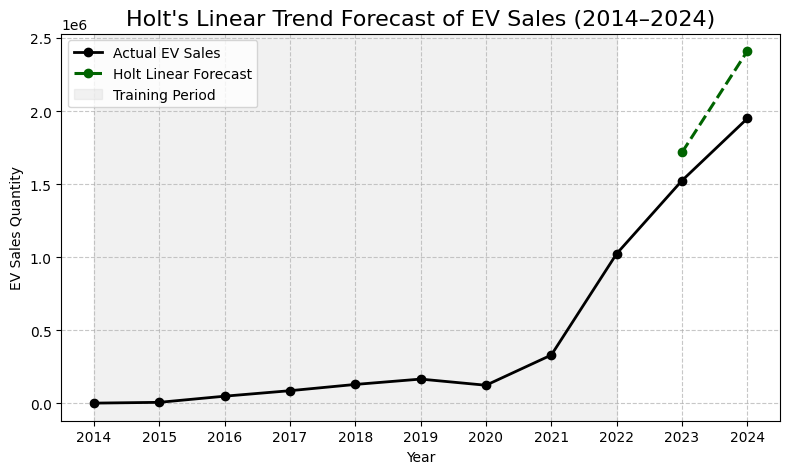


 Holt Model: Actual vs Predicted EV Sales
    Year  Actual_EV_Sales  Predicted_EV_Sales      Error
9   2023          1525179          1717947.98 -192768.98
10  2024          1950059          2411172.97 -461113.97


In [ ]:
# Holt's Linear Trend Model for EV Sales (2014–2024)

from statsmodels.tsa.holtwinters import ExponentialSmoothing

warnings.filterwarnings("ignore")

# Step 9: Holt’s Linear Model (Double Exponential Smoothing)
model = ExponentialSmoothing(train, trend='add', seasonal=None)
fitted = model.fit()

# Step 10: Forecast for 2023–2024
forecast = fitted.forecast(steps=len(test))
forecast = pd.Series(forecast, index=test.index)

# Step 11: Model Evaluation
mae  = mean_absolute_error(test, forecast)
rmse = np.sqrt(mean_squared_error(test, forecast))
mape = np.mean(np.abs((test - forecast) / test)) * 100
r2   = r2_score(test, forecast)

print(" Holt’s Linear Trend Model Forecast Accuracy (2014–2024)")
print(f"MAE:  {mae:,.2f}")
print(f"RMSE: {rmse:,.2f}")
print(f"MAPE: {mape:.2f}%")
print(f"R²:   {r2:.4f}")

# Step 12: Plot Actual vs Holt Forecast
plt.figure(figsize=(8, 5))

plt.plot(df_yearly['year'], df_yearly['ev_sales_quantity'],
         label='Actual EV Sales', color='black', marker='o', linewidth=2)

plt.plot(df_yearly.loc[df_yearly['year'] > 2022, 'year'],
         forecast.values, label='Holt Linear Forecast',
         color='darkgreen', linestyle='--', marker='o', linewidth=2.2)

plt.axvspan(2014, 2022, color='lightgray', alpha=0.3, label='Training Period')

plt.title("Holt's Linear Trend Forecast of EV Sales (2014–2024)", fontsize=16)
plt.xlabel("Year")
plt.ylabel("EV Sales Quantity")
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=10)
plt.xticks(np.arange(2014, 2025, 1))
plt.tight_layout()
plt.show()

# Step 13: Comparison Table
comparison_df = pd.DataFrame({
    'Year': df_yearly.loc[df_yearly['year'] > 2022, 'year'],
    'Actual_EV_Sales': test.values,
    'Predicted_EV_Sales': forecast.values,
    'Error': test.values - forecast.values
})

print("\n Holt Model: Actual vs Predicted EV Sales")
print(comparison_df.round(2))


 Damped Holt’s Linear Trend Model Forecast Accuracy (2014–2024)
MAE:  320,017.89
RMSE: 345,684.64
MAPE: 17.76%
R²:   -1.6478


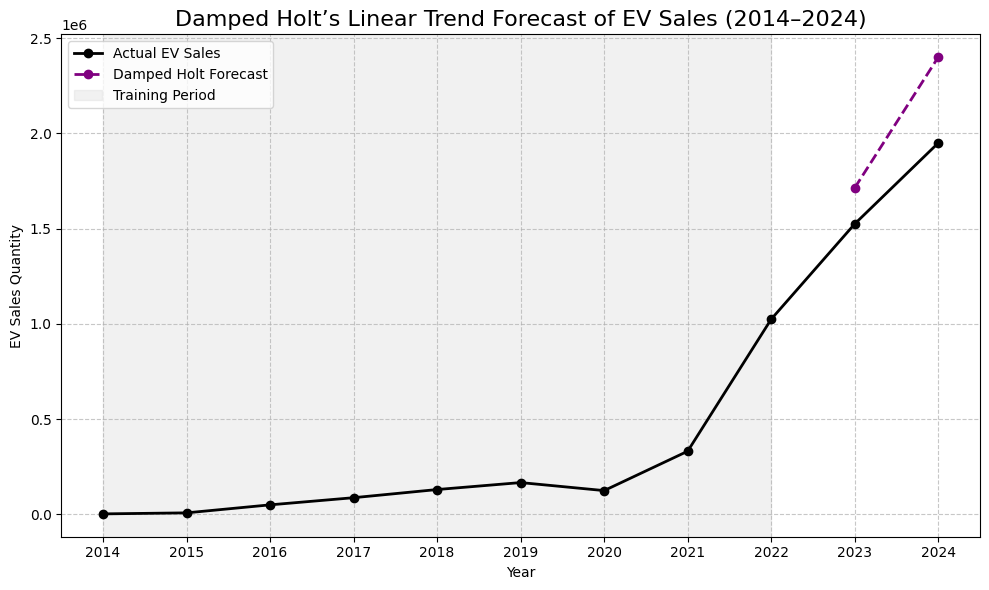


 Damped Holt’s Model: Actual vs Predicted EV Sales
   Year  Actual_EV_Sales  Predicted_EV_Sales      Error
0  2023        1525179.0          1714481.86 -189302.86
1  2024        1950059.0          2400791.93 -450732.93


In [ ]:
# Damped Holt’s Linear Trend Model for EV Sales Forecast (2014–2024)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Step 1: Prepare yearly EV sales data
df_yearly['year'] = df_yearly['year'].astype(int)
ev_series = df_yearly.set_index('year')['ev_sales_quantity'].astype(float)

# Step 2: Train-test split
train = ev_series[ev_series.index <= 2022]
test = ev_series[ev_series.index > 2022]  # 2023–2024

# Step 3: Fit Damped Holt’s Linear Trend Model
model_damped = ExponentialSmoothing(
    train,
    trend='add',
    damped_trend=True,
    seasonal=None
).fit(optimized=True)

# Step 4: Forecast for test period (2023–2024)
forecast_damped = model_damped.forecast(len(test))

# FIX: align forecast index properly
forecast_damped.index = test.index  # force forecast years to match test years

# Step 5: Replace any invalid values
forecast_damped = forecast_damped.astype(float)
test = test.astype(float)

# Step 6: Handle NaNs and zero values safely
mask = (test.notna()) & (forecast_damped.notna())
test_safe = test[mask]
forecast_safe = forecast_damped[mask]

# Avoid divide-by-zero in MAPE
test_nonzero = test_safe.replace(0, np.nan)

# Step 7: Compute Evaluation Metrics
mae_damped  = mean_absolute_error(test_safe, forecast_safe)
rmse_damped = np.sqrt(mean_squared_error(test_safe, forecast_safe))
mape_damped = np.nanmean(np.abs((test_safe - forecast_safe) / test_nonzero)) * 100
r2_damped   = r2_score(test_safe, forecast_safe)

print(" Damped Holt’s Linear Trend Model Forecast Accuracy (2014–2024)")
print(f"MAE:  {mae_damped:,.2f}")
print(f"RMSE: {rmse_damped:,.2f}")
print(f"MAPE: {mape_damped:.2f}%")
print(f"R²:   {r2_damped:.4f}")

# Step 8: Plot Actual vs Forecast
plt.figure(figsize=(10, 6))
plt.plot(ev_series.index, ev_series.values, label='Actual EV Sales', color='black', marker='o', linewidth=2)
plt.plot(forecast_damped.index, forecast_damped.values, label='Damped Holt Forecast', color='purple', linestyle='--', marker='o', linewidth=2)
plt.axvspan(2014, 2022, color='lightgray', alpha=0.3, label='Training Period')

plt.title("Damped Holt’s Linear Trend Forecast of EV Sales (2014–2024)", fontsize=16)
plt.xlabel("Year")
plt.ylabel("EV Sales Quantity")
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=10)
plt.xticks(np.arange(2014, 2025, 1))
plt.tight_layout()
plt.show()

# Step 9: Year-wise Comparison Table (2023–2024)
comparison_damped = pd.DataFrame({
    'Year': test_safe.index,
    'Actual_EV_Sales': test_safe.values,
    'Predicted_EV_Sales': forecast_safe.values,
    'Error': test_safe.values - forecast_safe.values
})

print("\n Damped Holt’s Model: Actual vs Predicted EV Sales")
print(comparison_damped.round(2))

Applying DEEP LEARNING MODELS

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step
 LSTM Model Forecast Accuracy (2014–2024)
MAE:  3,384,964.12
RMSE: 4,248,703.72
MAPE: 179.42%
R²:   -398.9819


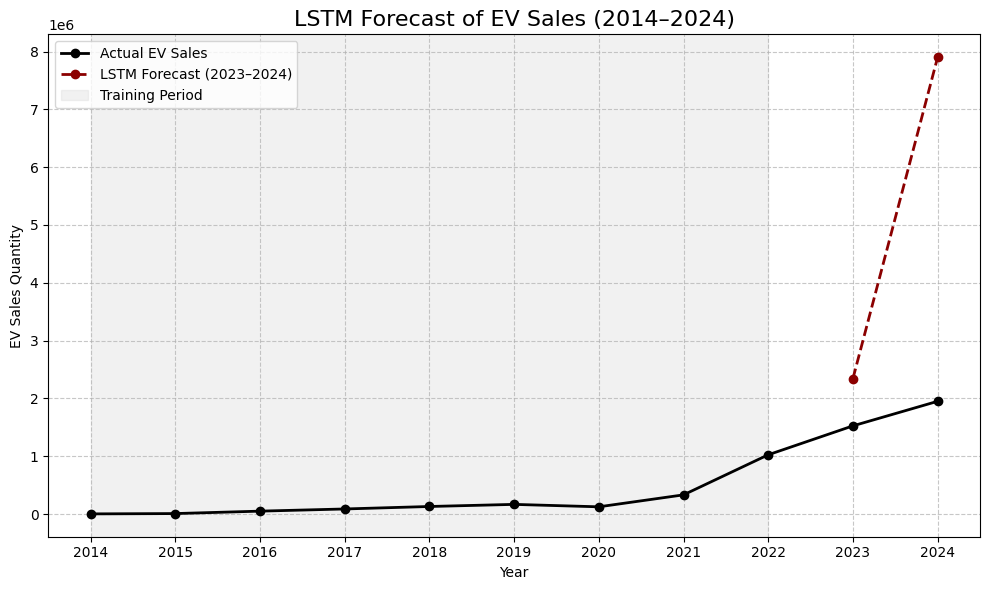


 LSTM Model: Actual vs Predicted EV Sales
   Year  Actual_EV_Sales  Predicted_EV_Sales       Error
0  2023        1525179.0          2342361.75  -817182.75
1  2024        1950059.0          7902804.50 -5952745.50


In [ ]:
# LSTM Model for EV Sales Forecast (2014–2024)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

import random
import os

# Step 1: Set seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)
random.seed(42)
os.environ['PYTHONHASHSEED'] = '42'

# Step 2: Disable GPU non-determinism (optional)
os.environ['TF_DETERMINISTIC_OPS'] = '1'

# Step 1: Prepare yearly EV sales data
df_yearly['year'] = df_yearly['year'].astype(int)
ev_values = df_yearly['ev_sales_quantity'].values.reshape(-1, 1)

# Step 2: Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
ev_scaled = scaler.fit_transform(ev_values)

# Step 3: Create sequences (lookback = 3 years)
def create_sequences(data, lookback=3):
    X, y = [], []
    for i in range(lookback, len(data)):
        X.append(data[i - lookback:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

lookback = 3
X, y = create_sequences(ev_scaled, lookback)

# Step 4: Split into train and test (2014–2022 train, 2023–2024 test)
split_index = len(df_yearly[df_yearly['year'] <= 2022]) - lookback
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Step 5: Reshape for LSTM (samples, timesteps, features)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Step 6: Build the LSTM model
model_lstm = Sequential([
    LSTM(64, activation='relu', input_shape=(lookback, 1), return_sequences=False),
    Dense(32, activation='relu'),
    Dense(1)
])

model_lstm.compile(optimizer='adam', loss='mse')

# Step 7: Train the model
history = model_lstm.fit(X_train, y_train, epochs=200, batch_size=1, verbose=0)

# Step 8: Forecast on test data
y_pred_scaled = model_lstm.predict(X_test)
y_pred = scaler.inverse_transform(y_pred_scaled.reshape(-1, 1))
y_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Step 9: Evaluation metrics
mae_lstm  = mean_absolute_error(y_actual, y_pred)
rmse_lstm = np.sqrt(mean_squared_error(y_actual, y_pred))
mape_lstm = np.mean(np.abs((y_actual - y_pred) / y_actual)) * 100
r2_lstm   = r2_score(y_actual, y_pred)

print(" LSTM Model Forecast Accuracy (2014–2024)")
print(f"MAE:  {mae_lstm:,.2f}")
print(f"RMSE: {rmse_lstm:,.2f}")
print(f"MAPE: {mape_lstm:.2f}%")
print(f"R²:   {r2_lstm:.4f}")

# Step 10: Plot Actual vs Predicted (including test years)
years = df_yearly['year'].values
pred_years = years[lookback + split_index : lookback + split_index + len(y_pred)]

plt.figure(figsize=(10, 6))
plt.plot(years, ev_values, label='Actual EV Sales', color='black', marker='o', linewidth=2)
plt.plot(pred_years, y_pred, label='LSTM Forecast (2023–2024)', color='darkred', linestyle='--', marker='o', linewidth=2)

plt.axvspan(2014, 2022, color='lightgray', alpha=0.3, label='Training Period')
plt.title("LSTM Forecast of EV Sales (2014–2024)", fontsize=16)
plt.xlabel("Year")
plt.ylabel("EV Sales Quantity")
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=10)
plt.xticks(np.arange(2014, 2025, 1))
plt.tight_layout()
plt.show()

# Step 11: Comparison Table
comparison_lstm = pd.DataFrame({
    'Year': pred_years,
    'Actual_EV_Sales': y_actual.flatten(),
    'Predicted_EV_Sales': y_pred.flatten(),
    'Error': (y_actual - y_pred).flatten()
})

print("\n LSTM Model: Actual vs Predicted EV Sales")
print(comparison_lstm.round(2))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step
 GRU Model Forecast Accuracy (2014–2024)
MAE:  1,868,750.50
RMSE: 2,180,196.92
MAPE: 101.16%
R²:   -104.3219


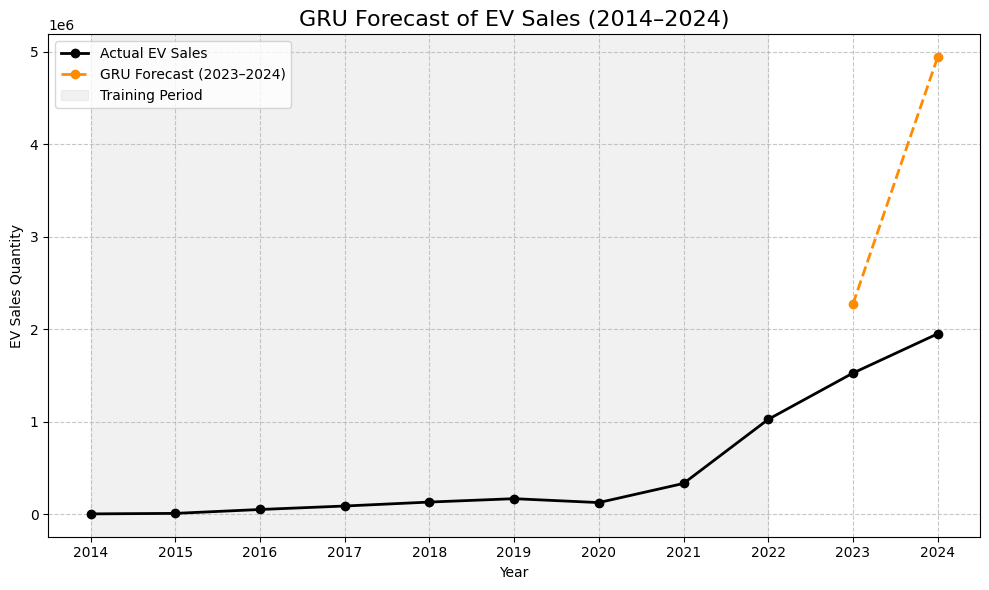

GRU Model: Actual vs Predicted EV Sales
   Year  Actual_EV_Sales  Predicted_EV_Sales      Error
0  2023        1525179.0           2270973.5  -745794.5
1  2024        1950059.0           4941765.5 -2991706.5


In [ ]:
# GRU Model for EV Sales Forecast (2014–2024)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense

# Step 1: Prepare yearly EV sales data
df_yearly['year'] = df_yearly['year'].astype(int)
ev_values = df_yearly['ev_sales_quantity'].values.reshape(-1, 1)

# Step 2: Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
ev_scaled = scaler.fit_transform(ev_values)

# Step 3: Create sequences (lookback = 3 years)
def create_sequences(data, lookback=3):
    X, y = [], []
    for i in range(lookback, len(data)):
        X.append(data[i - lookback:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

lookback = 3
X, y = create_sequences(ev_scaled, lookback)

# Step 4: Split into train and test (2014–2022 train, 2023–2024 test)
split_index = len(df_yearly[df_yearly['year'] <= 2022]) - lookback
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Step 5: Reshape for GRU (samples, timesteps, features)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Step 6: Build GRU model
model_gru = Sequential([
    GRU(64, activation='relu', input_shape=(lookback, 1), return_sequences=False),
    Dense(32, activation='relu'),
    Dense(1)
])

model_gru.compile(optimizer='adam', loss='mse')

# Step 7: Train the model
history_gru = model_gru.fit(X_train, y_train, epochs=200, batch_size=1, verbose=0)

# Step 8: Forecast on test data
y_pred_scaled = model_gru.predict(X_test)
y_pred = scaler.inverse_transform(y_pred_scaled.reshape(-1, 1))
y_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Step 9: Evaluation metrics
mae_gru  = mean_absolute_error(y_actual, y_pred)
rmse_gru = np.sqrt(mean_squared_error(y_actual, y_pred))
mape_gru = np.mean(np.abs((y_actual - y_pred) / y_actual)) * 100
r2_gru   = r2_score(y_actual, y_pred)

print(" GRU Model Forecast Accuracy (2014–2024)")
print(f"MAE:  {mae_gru:,.2f}")
print(f"RMSE: {rmse_gru:,.2f}")
print(f"MAPE: {mape_gru:.2f}%")
print(f"R²:   {r2_gru:.4f}")

# Step 10: Plot Actual vs Forecast (including test years)
years = df_yearly['year'].values
pred_years = years[lookback + split_index : lookback + split_index + len(y_pred)]

plt.figure(figsize=(10, 6))
plt.plot(years, ev_values, label='Actual EV Sales', color='black', marker='o', linewidth=2)
plt.plot(pred_years, y_pred, label='GRU Forecast (2023–2024)', color='darkorange', linestyle='--', marker='o', linewidth=2)

plt.axvspan(2014, 2022, color='lightgray', alpha=0.3, label='Training Period')
plt.title("GRU Forecast of EV Sales (2014–2024)", fontsize=16)
plt.xlabel("Year")
plt.ylabel("EV Sales Quantity")
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=10)
plt.xticks(np.arange(2014, 2025, 1))
plt.tight_layout()
plt.show()

# Step 11: Comparison Table
comparison_gru = pd.DataFrame({
    'Year': pred_years,
    'Actual_EV_Sales': y_actual.flatten(),
    'Predicted_EV_Sales': y_pred.flatten(),
    'Error': (y_actual - y_pred).flatten()
})

print("GRU Model: Actual vs Predicted EV Sales")
print(comparison_gru.round(2))

 XGBoost Model Forecast Accuracy (2014–2024)
MAE:  811,604.50
RMSE: 816,640.52
MAPE: 46.77%
R²:   -13.7771


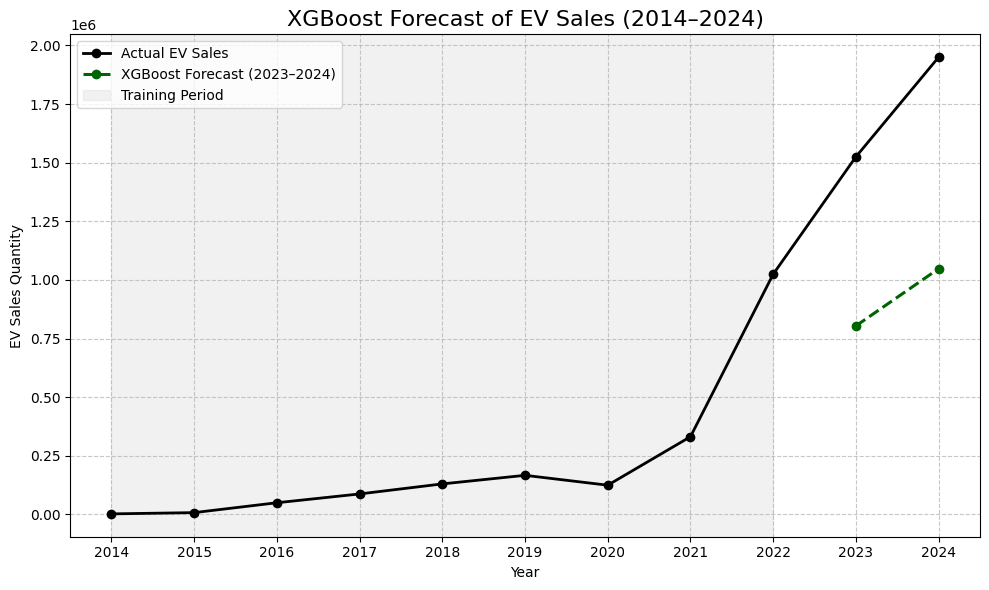


 XGBoost Model: Actual vs Predicted EV Sales
   Year  Actual_EV_Sales  Predicted_EV_Sales      Error
6  2023          1525179          804127.625  721051.38
7  2024          1950059         1047901.375  902157.62


In [ ]:
# XGBoost Model for EV Sales Forecast (2014–2024)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor

# Step 1: Prepare yearly dataset
df_yearly['year'] = df_yearly['year'].astype(int)
df_xgb = df_yearly[['year', 'ev_sales_quantity']].copy().sort_values('year').reset_index(drop=True)

# Step 2: Create lag features
df_xgb['lag1'] = df_xgb['ev_sales_quantity'].shift(1)
df_xgb['lag2'] = df_xgb['ev_sales_quantity'].shift(2)
df_xgb['lag3'] = df_xgb['ev_sales_quantity'].shift(3)

# Step 3: Separate full data for plotting and training subset
df_plot = df_xgb.copy()  # full data for visualization
df_train = df_xgb.dropna().reset_index(drop=True)  # remove lag NaN rows for training

# Step 4: Define features and target
X = df_train[['lag1', 'lag2', 'lag3']]
y = df_train['ev_sales_quantity']

# Step 5: Split train/test sets (2014–2022 train, 2023–2024 test)
train_mask = df_train['year'] <= 2022
test_mask = df_train['year'] > 2022

X_train, X_test = X[train_mask], X[test_mask]
y_train, y_test = y[train_mask], y[test_mask]

# Step 6: Initialize and train XGBoost
model_xgb = XGBRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=3,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

model_xgb.fit(X_train, y_train)

# Step 7: Make predictions
y_pred = model_xgb.predict(X_test)

# Step 8: Evaluate model
mae_xgb  = mean_absolute_error(y_test, y_pred)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred))
mape_xgb = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
r2_xgb   = r2_score(y_test, y_pred)

print(" XGBoost Model Forecast Accuracy (2014–2024)")
print(f"MAE:  {mae_xgb:,.2f}")
print(f"RMSE: {rmse_xgb:,.2f}")
print(f"MAPE: {mape_xgb:.2f}%")
print(f"R²:   {r2_xgb:.4f}")

# Step 9: Prepare test-year alignment
test_years = df_train.loc[test_mask, 'year']

# Step 10: Plot full actual vs predicted (2014–2024)
plt.figure(figsize=(10, 6))

# Actual full data (2014–2024)
plt.plot(df_plot['year'], df_plot['ev_sales_quantity'], label='Actual EV Sales',
         color='black', marker='o', linewidth=2)

# Forecasted (2023–2024)
plt.plot(test_years, y_pred, label='XGBoost Forecast (2023–2024)',
         color='darkgreen', linestyle='--', marker='o', linewidth=2.2)

# Training period shading
plt.axvspan(2014, 2022, color='lightgray', alpha=0.3, label='Training Period')

plt.title("XGBoost Forecast of EV Sales (2014–2024)", fontsize=16)
plt.xlabel("Year")
plt.ylabel("EV Sales Quantity")
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=10)
plt.xticks(np.arange(2014, 2025, 1))
plt.tight_layout()
plt.show()

# Step 11: Comparison Table
comparison_xgb = pd.DataFrame({
    'Year': test_years,
    'Actual_EV_Sales': y_test.values,
    'Predicted_EV_Sales': y_pred,
    'Error': y_test.values - y_pred
})

print("\n XGBoost Model: Actual vs Predicted EV Sales")
print(comparison_xgb.round(2))

Predicting EV sales upto 2030 using HOLT LINEAR MODEL.



 Forecasted EV Sales (2025–2030) using Holt’s Linear Model:
2025    1717947.98
2026    2411172.97
2027    3104397.96
2028    3797622.95
2029    4490847.94
2030    5184072.93
dtype: float64


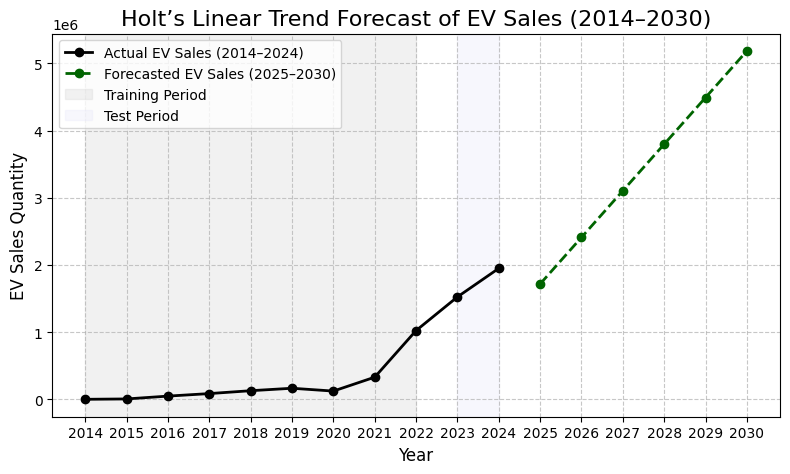

In [ ]:
# Future Forecast (2025–2030) using Holt’s Linear Trend Model

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Forecast future years (2025–2030)
future_years = 2030 - df_yearly['year'].max()  # from 2024 → 2030 = 6 years
forecast_future_holt = fitted.forecast(future_years)
forecast_future_holt.index = np.arange(df_yearly['year'].max() + 1, 2031)

# Step 2: Display forecasted values
print("\n Forecasted EV Sales (2025–2030) using Holt’s Linear Model:")
print(forecast_future_holt.round(2))

# Step 3: Combine historical + forecast data
ev_series_full = df_yearly.set_index('year')['ev_sales_quantity']
combined_forecast_holt = pd.concat([ev_series_full, forecast_future_holt])

# Step 4: Plot complete EV sales trend (2014–2030)
plt.figure(figsize=(8, 5))
plt.plot(ev_series_full.index, ev_series_full.values,
         label='Actual EV Sales (2014–2024)', color='black', marker='o', linewidth=2)
plt.plot(forecast_future_holt.index, forecast_future_holt.values,
         label='Forecasted EV Sales (2025–2030)', color='darkgreen', linestyle='--', marker='o', linewidth=2)

# Highlight train and test periods
plt.axvspan(2014, 2022, color='lightgray', alpha=0.3, label='Training Period')
plt.axvspan(2023, 2024, color='lavender', alpha=0.3, label='Test Period')

# Labels and aesthetics
plt.title("Holt’s Linear Trend Forecast of EV Sales (2014–2030)", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("EV Sales Quantity", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=10)
plt.xticks(np.arange(2014, 2031, 1))
plt.tight_layout()
plt.show()

# Step 5: Create future forecast table for clarity
future_forecast_table_holt = pd.DataFrame({
    'Year': forecast_future_holt.index,
    'Predicted_EV_Sales': forecast_future_holt.values.round(2)
})

In [ ]:
# Predict State-wise EV Sales for 2030 based on 2024 distribution

import pandas as pd

# Step 1: Standardize column names to lowercase and remove extra spaces
df_ev.columns = df_ev.columns.str.strip().str.lower()

# Step 2: Identify correct column names
if 'year' not in df_ev.columns:
    raise KeyError("Column 'year' not found. Please ensure your dataset has a 'year' column.")
if 'state' not in df_ev.columns:
    raise KeyError("Column 'state' not found. Please ensure your dataset has a 'state' column.")
if 'ev_sales_quantity' not in df_ev.columns:
    raise KeyError("Column 'ev_sales_quantity' not found. Please ensure your dataset has EV sales data.")

# Step 3: Filter data for the most recent year (2024)
latest_year = df_ev['year'].max()
df_latest = df_ev[df_ev['year'] == latest_year].copy()

# Step 4: Calculate each state's share of total EV sales in 2024
total_latest_sales = df_latest['ev_sales_quantity'].sum()
df_latest['share_latest'] = df_latest['ev_sales_quantity'] / total_latest_sales

# Step 5: Get total EV forecast for 2030 from Holt’s Linear model
predicted_total_2030 = forecast_future_holt.loc[2030]

# Step 6: Estimate 2030 EV sales for each state based on 2024 share (with rounding)
df_2030_forecast = df_latest[['state', 'share_latest']].copy()
df_2030_forecast['predicted_ev_sales_2030'] = (
    df_2030_forecast['share_latest'] * predicted_total_2030
).round(0).astype(int)

# Step 7: Sort by predicted EV sales
df_2030_forecast = df_2030_forecast.sort_values(
    by='predicted_ev_sales_2030', ascending=False
).reset_index(drop=True)

# Step 8: Display results
print(f"\nPredicted State-wise EV Sales for 2030 (based on {latest_year} distribution)")
print(f"Total 2030 forecast (from Holt’s model): {int(predicted_total_2030):,}\n")
print(df_2030_forecast[['state', 'predicted_ev_sales_2030']])




Predicted State-wise EV Sales for 2030 (based on 2024 distribution)
Total 2030 forecast (from Holt’s model): 5,184,072

                state  predicted_ev_sales_2030
0       Uttar Pradesh                   981228
1         Maharashtra                   643180
2           Karnataka                   475955
3          Tamil Nadu                   349534
4               Bihar                   300013
5           Rajasthan                   290812
6      Madhya Pradesh                   266677
7              Kerala                   221146
8               Delhi                   213476
9             Gujarat                   201402
10              Assam                   181115
11             Odisha                   173645
12     Andhra Pradesh                   150179
13       Chhattisgarh                   129715
14        West Bengal                   121290
15             Punjab                   118228
16            Haryana                   114275
17          Jharkhand            

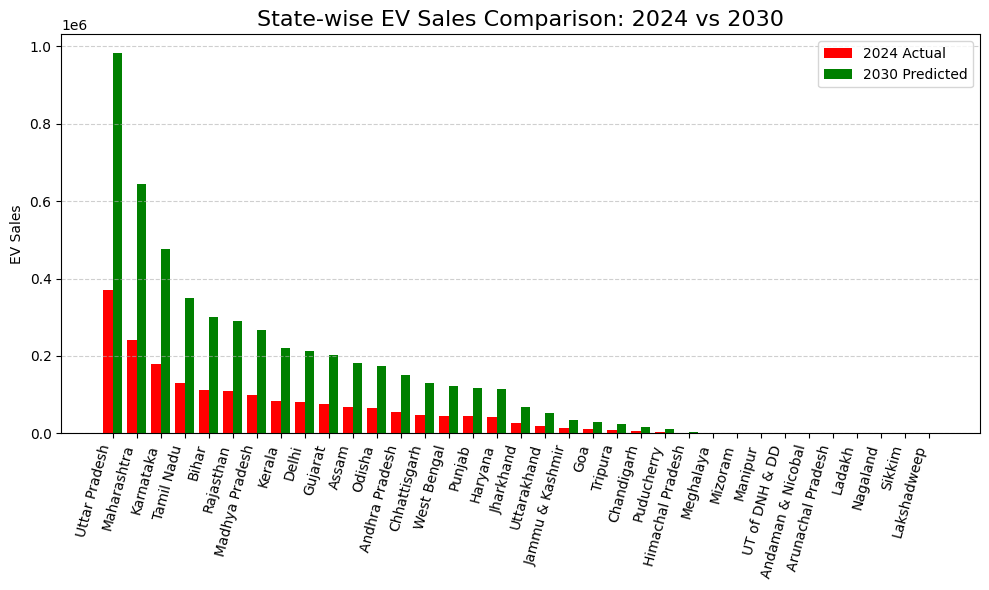

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
# Step 1: Merge 2024 and 2030 statewise data
df_compare = df_latest[['state', 'ev_sales_quantity']].copy()
df_compare.rename(columns={'ev_sales_quantity': 'ev_2024'}, inplace=True)

df_compare = df_compare.merge(
    df_2030_forecast[['state', 'predicted_ev_sales_2030']],
    on='state',
    how='left'
)

df_compare = df_compare.sort_values(by='predicted_ev_sales_2030', ascending=False)

# Step 2: Plot 2024 vs 2030 (Bar chart)
plt.figure(figsize=(10, 6))

x = np.arange(len(df_compare['state']))

plt.bar(x - 0.2, df_compare['ev_2024'], width=0.4, label='2024 Actual', color='red')
plt.bar(x + 0.2, df_compare['predicted_ev_sales_2030'], width=0.4, label='2030 Predicted', color='green')

plt.xticks(x, df_compare['state'], rotation=75, ha='right')
plt.ylabel("EV Sales")
plt.title("State-wise EV Sales Comparison: 2024 vs 2030", fontsize=16)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()


#OBJECTIVE 3
To estimate how many charging stations will be required to maintain a healthy EV-to-charger ratio.

In [ ]:
# STATE-WISE EV SALES FORECAST FOR 2026–2029 USING 2024 SHARE

import pandas as pd

# df_latest contains 2024 EV distribution
# df_latest['share_latest'] → each state’s share of national EV sales in 2024

df_shares = df_latest[['state', 'share_latest']].copy()

# Extract 2026–2029 totals from Holt’s forecast

ev_2026 = forecast_future_holt.loc[2026]
ev_2027 = forecast_future_holt.loc[2027]
ev_2028 = forecast_future_holt.loc[2028]
ev_2029 = forecast_future_holt.loc[2029]

print("Forecast values:")
print("2026:", ev_2026)
print("2027:", ev_2027)
print("2028:", ev_2028)
print("2029:", ev_2029)


# Calculate state-wise EV for each year

df_state_forecast = df_shares.copy()

df_state_forecast['ev_2026'] = (df_shares['share_latest'] * ev_2026).round(0).astype(int)
df_state_forecast['ev_2027'] = (df_shares['share_latest'] * ev_2027).round(0).astype(int)
df_state_forecast['ev_2028'] = (df_shares['share_latest'] * ev_2028).round(0).astype(int)
df_state_forecast['ev_2029'] = (df_shares['share_latest'] * ev_2029).round(0).astype(int)


# Sum 2026–2029 EV sales

df_state_forecast['total_2026_29'] = (
    df_state_forecast['ev_2026'] +
    df_state_forecast['ev_2027'] +
    df_state_forecast['ev_2028'] +
    df_state_forecast['ev_2029']
)


# Sort and display

df_state_forecast = df_state_forecast.sort_values(
    by='total_2026_29', ascending=False
).reset_index(drop=True)

print("State-wise EV Sales Forecast (2026–2029)")
print(df_state_forecast)


Forecast values:
2026: 2411172.971178814
2027: 3104397.9603922656
2028: 3797622.9496057164
2029: 4490847.938819168
State-wise EV Sales Forecast (2026–2029)

                state  share_latest  ev_2026  ev_2027  ev_2028  ev_2029  \
0       Uttar Pradesh      0.189277   456380   587592   718804   850016   
1         Maharashtra      0.124069   299151   385158   471166   557173   
2           Karnataka      0.091811   221372   285018   348664   412310   
3          Tamil Nadu      0.067425   162572   209313   256053   302794   
4               Bihar      0.057872   139540   179658   219776   259895   
5           Rajasthan      0.056097   135260   174148   213036   251924   
6      Madhya Pradesh      0.051442   124034   159695   195355   231016   
7              Kerala      0.042659   102858   132430   162002   191574   
8               Delhi      0.041179    99290   127837   156383   184930   
9             Gujarat      0.038850    93674   120606   147538   174470   
10              As

In [ ]:
#  STATE-WISE EV SALES FORECAST 2026–2030 + TOTAL
import pandas as pd

# Step 1: Extract state shares (from 2024 EV distribution) ----
df_shares = df_latest[['state', 'share_latest']].copy()

# Step 2: Extract national EV forecasts from Holt ----
ev_2026 = float(forecast_future_holt.loc[2026])
ev_2027 = float(forecast_future_holt.loc[2027])
ev_2028 = float(forecast_future_holt.loc[2028])
ev_2029 = float(forecast_future_holt.loc[2029])
ev_2030 = float(forecast_future_holt.loc[2030])  # already used earlier

print("Forecast values (Holt):")
print("2026:", ev_2026)
print("2027:", ev_2027)
print("2028:", ev_2028)
print("2029:", ev_2029)
print("2030:", ev_2030)

# Step 3: Calculate state-wise EV for each year
df_state_forecast = df_shares.copy()

df_state_forecast['ev_2026'] = (df_shares['share_latest'] * ev_2026).round(0).astype(int)
df_state_forecast['ev_2027'] = (df_shares['share_latest'] * ev_2027).round(0).astype(int)
df_state_forecast['ev_2028'] = (df_shares['share_latest'] * ev_2028).round(0).astype(int)
df_state_forecast['ev_2029'] = (df_shares['share_latest'] * ev_2029).round(0).astype(int)
df_state_forecast['ev_2030'] = (df_shares['share_latest'] * ev_2030).round(0).astype(int)

# Step 4: Calculate 5-year total (2026–2030)
df_state_forecast['total_2026_2030'] = (
    df_state_forecast['ev_2026'] +
    df_state_forecast['ev_2027'] +
    df_state_forecast['ev_2028'] +
    df_state_forecast['ev_2029'] +
    df_state_forecast['ev_2030']
)

# Step 5: Sort by total EV
df_state_forecast = df_state_forecast.sort_values(
    by='total_2026_2030', ascending=False
).reset_index(drop=True)

# Step 6: Display results
print("\nState-wise EV Sales (2026–2030)\n")
print(df_state_forecast)


Forecast values (Holt):
2026: 2411172.971178814
2027: 3104397.9603922656
2028: 3797622.9496057164
2029: 4490847.938819168
2030: 5184072.92803262

State-wise EV Sales (2026–2030)

                state  share_latest  ev_2026  ev_2027  ev_2028  ev_2029  \
0       Uttar Pradesh      0.189277   456380   587592   718804   850016   
1         Maharashtra      0.124069   299151   385158   471166   557173   
2           Karnataka      0.091811   221372   285018   348664   412310   
3          Tamil Nadu      0.067425   162572   209313   256053   302794   
4               Bihar      0.057872   139540   179658   219776   259895   
5           Rajasthan      0.056097   135260   174148   213036   251924   
6      Madhya Pradesh      0.051442   124034   159695   195355   231016   
7              Kerala      0.042659   102858   132430   162002   191574   
8               Delhi      0.041179    99290   127837   156383   184930   
9             Gujarat      0.038850    93674   120606   147538   174470

In [ ]:
import numpy as np
import pandas as pd

# INPUT DATA (Your 3 known ratio data points)

ratio_2023 = 231.58
ratio_2024 = 119.28
ratio_2025 = 76.25

ev_2030 = 5184072.93   # Your EV forecast for 2030

# STEP 1: Compute improvements (drops in ratio)

delta_1 = ratio_2023 - ratio_2024   # Improvement 2023 → 2024
delta_2 = ratio_2024 - ratio_2025   # Improvement 2024 → 2025

# Slowing factor k (rate of decline reduction)
k = delta_2 / delta_1

print("Slowing factor k:", k)

# STEP 2: Predict improvements for 2026–2030
# Each year's improvement = previous improvement × k

# Store improvements year by year
future_deltas = [delta_2]  # delta_2 already known (43.03 approx)

# Compute next 5 improvements (2026, 2027, 2028, 2029, 2030)
for i in range(5):
    next_delta = future_deltas[-1] * k
    future_deltas.append(next_delta)

future_deltas = future_deltas[1:]   # remove duplicate first entry

# STEP 3: Compute ratios for 2026–2030

ratios = {
    2023: ratio_2023,
    2024: ratio_2024,
    2025: ratio_2025
}

current_ratio = ratio_2025

years = [2026, 2027, 2028, 2029, 2030]

for year, delta in zip(years, future_deltas):
    new_ratio = current_ratio - delta
    ratios[year] = new_ratio
    current_ratio = new_ratio

# Extract the 2030 ratio
ratio_2030 = ratios[2030]

# STEP 4: Compute charging stations needed in 2030

charging_stations_2030 = ev_2030 / ratio_2030

# PRINT RESULTS

print("\nYEAR-WISE EV-TO-CHARGER RATIOS (Slowing Improvement Model)")
for yr in sorted(ratios.keys()):
    print(f"{yr}: {ratios[yr]:.2f}")

print("\nPredicted EV-to-Charger Ratio in 2030:", round(ratio_2030, 2))
print("Charging Stations Needed in 2030:", round(charging_stations_2030))

print("""
Explanation:
We computed yearly improvements (drops in ratio) and observed that the
improvement slows each year. We applied the slowing factor k to project
future improvements until 2030. Then:
    Ratio_2030 = Ratio_2025 - Σ(future_deltas)
    Chargers_2030 = EV_2030 / Ratio_2030
""")

Slowing factor k: 0.3831700801424755

=== YEAR-WISE EV-TO-CHARGER RATIOS (Slowing Improvement Model) ===
2023: 231.58
2024: 119.28
2025: 76.25
2026: 59.76
2027: 53.44
2028: 51.02
2029: 50.10
2030: 49.74

Predicted EV-to-Charger Ratio in 2030: 49.74
Charging Stations Needed in 2030: 104222

Explanation:
We computed yearly improvements (drops in ratio) and observed that the
improvement slows each year. We applied the slowing factor k to project
future improvements until 2030. Then:
    Ratio_2030 = Ratio_2025 - Σ(future_deltas)
    Chargers_2030 = EV_2030 / Ratio_2030



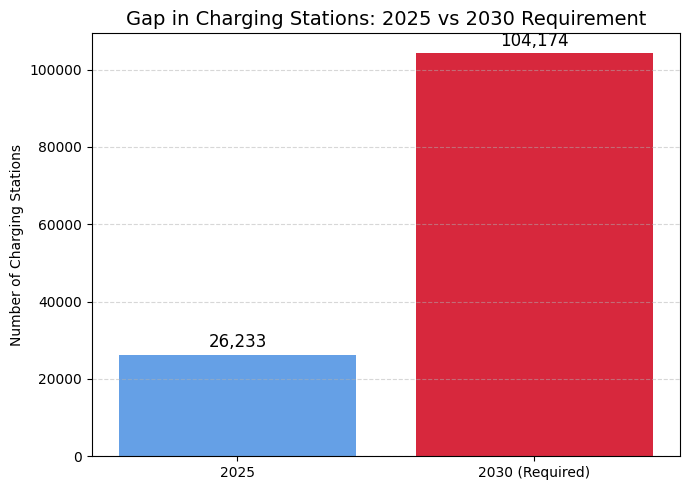

In [ ]:
import matplotlib.pyplot as plt

# Known values
cs_2025 = 26233                # Charging stations in 2024
cs_2030_required = 104174       # What we calculated earlier

years = ["2025", "2030 (Required)"]
values = [cs_2025, cs_2030_required]

plt.figure(figsize=(7,5))

# Bar plot
bars = plt.bar(years, values, color=["#4A90E2", "#D0021B"], alpha=0.85)

# Adding labels
plt.title("Gap in Charging Stations: 2025 vs 2030 Requirement", fontsize=14)
plt.ylabel("Number of Charging Stations")

# Annotate values on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2,
             height + 2000,
             f"{int(height):,}",
             ha='center', fontsize=12)

# Add grid for clarity
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

# Step 1: average ratio
avg_ratio = (59.76 + 53.44 + 51.02 + 50.10 + 49.74) / 5
avg_ratio = round(avg_ratio, 3)

print("Average EV-to-Charger Ratio (2026–2030):", avg_ratio)

# Step 2: Using df_state_forecast (already computed earlier)
df_build = df_state_forecast.copy()

# Step 3: Total EV forecast from 2026 to 2030
df_build['ev_2026_2030'] = (
      df_build['ev_2026']
    + df_build['ev_2027']
    + df_build['ev_2028']
    + df_build['ev_2029']
    + df_build['ev_2030']
)

# Step 4: Chargers to be built (state-wise)
df_build['chargers_to_build_2026_2030'] = (
    df_build['ev_2026_2030'] / avg_ratio
).round(0).astype(int)

# Step 5: Sort for clarity
df_build = df_build.sort_values(by='chargers_to_build_2026_2030', ascending=False).reset_index(drop=True)

# Step 6: Display results
print("\n STATE-WISE CHARGING STATIONS TO BE BUILT (2026–2030) \n")
print(df_build[['state', 'ev_2026_2030', 'chargers_to_build_2026_2030']])

Average EV-to-Charger Ratio (2026–2030): 52.812

=== STATE-WISE CHARGING STATIONS TO BE BUILT (2026–2030) ===

                state  ev_2026_2030  chargers_to_build_2026_2030
0       Uttar Pradesh       3594020                        68053
1         Maharashtra       2355828                        44608
2           Karnataka       1743319                        33010
3          Tamil Nadu       1280266                        24242
4               Bihar       1098882                        20807
5           Rajasthan       1065180                        20169
6      Madhya Pradesh        976777                        18495
7              Kerala        810010                        15338
8               Delhi        781916                        14806
9             Gujarat        737690                        13968
10              Assam        663385                        12561
11             Odisha        636024                        12043
12     Andhra Pradesh        550073         